# Classification problem on Loan Status Prediction


# Problem statement:
We have dataset of people and their information related to loan, from that we identified either they have a loan or not. Then based on that we processed which classification rule get the best fitted model.


    

# Dataset Source:
https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset

# Data exploration

In [56]:
# importing libriries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [57]:
# load the file
df=pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [58]:
#To see last 5 rows
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [59]:
# Brief information like datatype, number of rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [60]:
# descriptipon of numerical data
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [61]:
# Loan_Id is not necessary for our prediction ,so we drop that column.
df.drop(["Loan_ID"], axis=1, inplace=True)

In [62]:
# To see null values columnwise
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [63]:
# Check is there any duplicate value
df1=df[df.duplicated()]
df1.shape
#there is no any duplicate value.

(0, 12)

# Handeling missing values
Total values=614
1.If 5-7% (30.7-42.98) are missing values,then drop that missing values
2.If 15-40% (92.1-245.6)are missing values, then replace it with average or median, or if data is categorical then replace with   mode.
3.If more than 50% (307) are missing values, then drop that entire column.


In [65]:
# As some missing values values are in first criterion so we have to drop that missing values.
df.dropna(axis=0, subset=["Gender","Dependents","Married","LoanAmount","Loan_Amount_Term"], inplace=True)
df.isnull().sum()


Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       48
Property_Area         0
Loan_Status           0
dtype: int64

In [66]:
# As Self_Employed column is of object type, so we have to replace that missing values by its mode.
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       48
Property_Area         0
Loan_Status           0
dtype: int64

In [67]:
# Here Credit_History is numerical column, so we replace null values by mean or median.
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].mean())
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

From above cleaning methods our all null values are handled.

# converting categorical data to numric

In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
le=LabelEncoder()
a=["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status","Dependents"]
for i in a:
    df[i]=le.fit_transform(df[i])


In [71]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [72]:
# Here we get to know that all the columns have numerical data.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             553 non-null    int32  
 1   Married            553 non-null    int32  
 2   Dependents         553 non-null    int32  
 3   Education          553 non-null    int32  
 4   Self_Employed      553 non-null    int32  
 5   ApplicantIncome    553 non-null    int64  
 6   CoapplicantIncome  553 non-null    float64
 7   LoanAmount         553 non-null    float64
 8   Loan_Amount_Term   553 non-null    float64
 9   Credit_History     553 non-null    float64
 10  Property_Area      553 non-null    int32  
 11  Loan_Status        553 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 41.0 KB


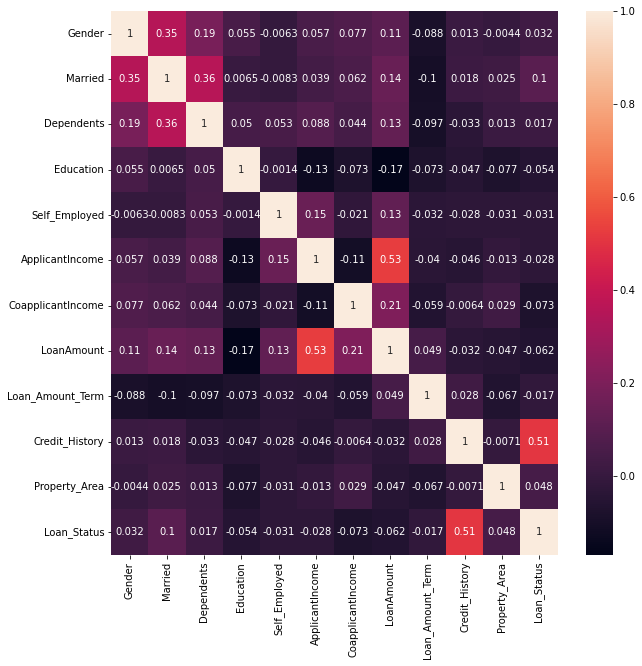

In [17]:
# we can see correlation by one of this way
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

In [73]:
# Loan_status is our target column, so check relation for that feature.
# Gender,Dependents,Property_Area, Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term have weak correlation with Loan_Status so we drop that column for further analysis.
df.drop(["Gender","Dependents","Property_Area","Education","Self_Employed","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1,inplace=True)
df.head()

,Married,Credit_History,Loan_Status
1,1,1.0,0
2,1,1.0,1
3,1,1.0,1
4,0,1.0,1
5,1,1.0,1


In [74]:
#showing counts for unique values of corresponding column.
df.Loan_Status.value_counts()

1    389
0    164
Name: Loan_Status, dtype: int64

Check skewness

In [20]:
from scipy.stats import skew

Married
-0.62522430859842


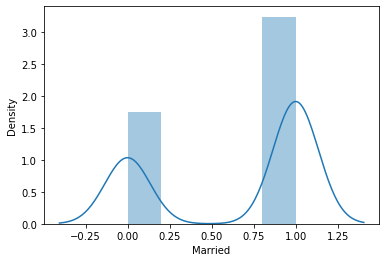

Credit_History
-2.16396116484361


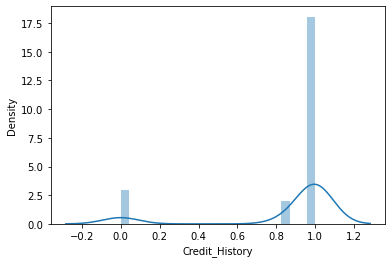

Loan_Status
-0.8908114558347268


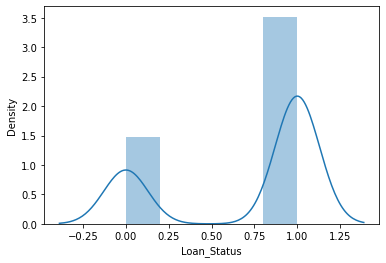

In [21]:
for i in df:
    print(i)
    print(skew(df[i]))
    
    plt.figure
    sns.distplot(df[i])
    plt.show()

<AxesSubplot:xlabel='Credit_History'>

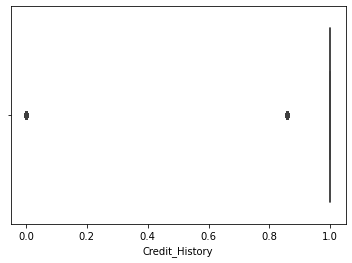

In [75]:
# Credit history have high negative skeweness.
# we will not remove outliers, as credit_history has good correlation with loan_status, if we remove outliers then it may be affected to correlation
sns.boxplot(data=df,x="Credit_History")

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

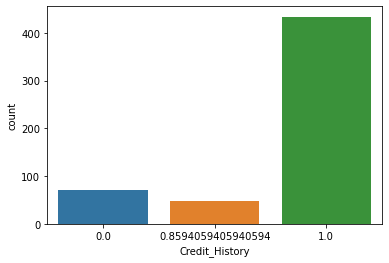

In [76]:
sns.countplot(df["Credit_History"])

# EDA is done here, now check that from which classification rule we get higher accuracy

# Model building

In [79]:
# x is independent variable, and y is dependent variable(target column), 
x=df.iloc[:,:-1].values
y=df.iloc[:,-1]


In [80]:
# import libraries for spliting our data into training and testing
from sklearn.model_selection import train_test_split

In [81]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)


In [82]:
# importing libraries for model selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier

In [83]:
# To check accuracy of model import below library
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [87]:
# create object for different classification models
logreg=LogisticRegression()
svm=SVC()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier(max_depth=1)
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

In [90]:
# create function for model selection.
def mmodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    
    train=model.score(xtrain,ytrain)
    test=model.score(xtest,ytest)
    print("Training Accuracy:",train)
    print("Testing Accuracy:",test)
    print()
    print("Accuracy:",accuracy_score(ytest,ypred))
    return model

In [91]:
# Check accuracy for Logistic Regression model
mmodel(logreg)

Training Accuracy: 0.8113695090439277
Testing Accuracy: 0.7951807228915663

Accuracy: 0.7951807228915663


LogisticRegression()

In [92]:
# Check accuracy for SVC model
mmodel(svm)

Training Accuracy: 0.8113695090439277
Testing Accuracy: 0.7951807228915663

Accuracy: 0.7951807228915663


SVC()

In [93]:
# To see which kernel is best suited for svm model
l=["linear","poly","sigmoid","rbf"]
for i in l:
    svm=SVC(kernel=i)
    svm.fit(xtrain,ytrain)
    ypred=svm.predict(xtest)
    print(f"{i}: {accuracy_score(ytest,ypred)}")
#As all the kernels have same accuracy except sigmoid so we can consider any one of them.

linear: 0.7951807228915663
poly: 0.7951807228915663
sigmoid: 0.6867469879518072
rbf: 0.7951807228915663


In [94]:
# Check accuracy for KNeighbors model
mmodel(knn)

Training Accuracy: 0.7829457364341085
Testing Accuracy: 0.7469879518072289

Accuracy: 0.7469879518072289


KNeighborsClassifier()

In [95]:
# To check which neighbors gave best accuracy
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    print(f"{i}: {accuracy_score(ytest,ypred)}")
    
# we get highest accuracy for i=9 , so we considetr that   

1: 0.7409638554216867
2: 0.6024096385542169
3: 0.7469879518072289
4: 0.608433734939759
5: 0.7469879518072289
6: 0.7469879518072289
7: 0.7469879518072289
8: 0.7469879518072289
9: 0.7951807228915663
10: 0.7951807228915663
11: 0.7951807228915663
12: 0.6566265060240963
13: 0.7951807228915663
14: 0.7951807228915663
15: 0.7951807228915663
16: 0.7951807228915663
17: 0.7951807228915663
18: 0.7951807228915663
19: 0.7951807228915663
20: 0.7951807228915663
21: 0.7951807228915663
22: 0.7951807228915663
23: 0.7951807228915663
24: 0.7951807228915663
25: 0.7951807228915663
26: 0.7951807228915663
27: 0.7951807228915663
28: 0.7951807228915663
29: 0.7951807228915663


In [96]:
knn=KNeighborsClassifier(n_neighbors=9)
mmodel(knn)

Training Accuracy: 0.8113695090439277
Testing Accuracy: 0.7951807228915663

Accuracy: 0.7951807228915663


KNeighborsClassifier(n_neighbors=9)

In [98]:
# Check accuracy for DecisionTree model
mmodel(dt)

Training Accuracy: 0.8113695090439277
Testing Accuracy: 0.7951807228915663

Accuracy: 0.7951807228915663


DecisionTreeClassifier(max_depth=1)

In [100]:
# Take random values and check result for that
logreg.fit(xtrain,ytrain)
ypred=logreg.predict([[0,1]])
ypred

array([1])

# Decision Tree Regularization
-This model is overfitting.
-Bagging decreases variance, not bias, and solves over-fitting issues in a model.

In [109]:
from sklearn.ensemble import BaggingClassifier

In [110]:
bg=BaggingClassifier(DecisionTreeClassifier())
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)
train=bg.score(xtrain,ytrain)
test=bg.score(xtest,ytest)

print(train)
print(test)
print(classification_report(ytest,ypred))

0.8113695090439277
0.7951807228915663
              precision    recall  f1-score   support

           0       0.92      0.42      0.57        55
           1       0.77      0.98      0.87       111

    accuracy                           0.80       166
   macro avg       0.85      0.70      0.72       166
weighted avg       0.82      0.80      0.77       166



In [111]:
bg=BaggingClassifier(DecisionTreeClassifier(criterion="entropy"))
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)
train=bg.score(xtrain,ytrain)
test=bg.score(xtest,ytest)

print(train)
print(test)
print(classification_report(ytest,ypred))

0.8113695090439277
0.7951807228915663
              precision    recall  f1-score   support

           0       0.92      0.42      0.57        55
           1       0.77      0.98      0.87       111

    accuracy                           0.80       166
   macro avg       0.85      0.70      0.72       166
weighted avg       0.82      0.80      0.77       166



# Conclusion:
From above  we get to know that using Bagging classifier, DecisionTree model gives best accuracy which is 80%. So using this we can classify whether that person have loan or not.